## Importing Necessary Libraries

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Data Upload

In [2]:
train_data = pd.read_csv("train.csv")
df_train = train_data.copy()
test_data = pd.read_csv("test.csv")
df_test = test_data.copy()
#train_data.head()
#test_data.head()

In [3]:
print(df_train.shape, df_test.shape)

(1460, 81) (1459, 80)


In [4]:
print(tabulate(df_train.describe().T,headers=df_train.describe().T.columns,tablefmt="psql"))

+---------------+---------+----------------+--------------+-------+-----------+----------+-----------+--------+
|               |   count |           mean |          std |   min |       25% |      50% |       75% |    max |
|---------------+---------+----------------+--------------+-------+-----------+----------+-----------+--------|
| Id            |    1460 |    730.5       |   421.61     |     1 |    365.75 |    730.5 |   1095.25 |   1460 |
| MSSubClass    |    1460 |     56.8973    |    42.3006   |    20 |     20    |     50   |     70    |    190 |
| LotFrontage   |    1201 |     70.05      |    24.2848   |    21 |     59    |     69   |     80    |    313 |
| LotArea       |    1460 |  10516.8       |  9981.26     |  1300 |   7553.5  |   9478.5 |  11601.5  | 215245 |
| OverallQual   |    1460 |      6.09932   |     1.383    |     1 |      5    |      6   |      7    |     10 |
| OverallCond   |    1460 |      5.57534   |     1.1128   |     1 |      5    |      5   |      6    |  

In [5]:
pd.DataFrame(df_train.dtypes,columns=['Type']).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Type,int64,int64,object,float64,int64,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64


### Number of Mıssing Values in Training and Test Sets

In [6]:
#df_train[df_train.isnull().values]
NaN_numbers_train = pd.DataFrame(df_train.isna().sum())
NaN_numbers_train = NaN_numbers_train[pd.DataFrame(df_train.isna().sum()).T.any()].T
NaN_numbers_train.rename(index={0: 'Missing'})

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
Missing,259,1369,8,8,37,37,38,37,38,1,690,81,81,81,81,81,1453,1179,1406


Alley, PoolQC, Fence, MiscFeature parameters are mostly missing. They should be treated accordingly !

In [7]:
NaN_numbers_test = pd.DataFrame(df_test.isna().sum())
NaN_numbers_test = NaN_numbers_test[pd.DataFrame(df_test.isna().sum()).T.any()].T
NaN_numbers_test.rename(index={0: 'Missing'})

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Missing,4,227,1352,2,1,1,16,15,44,45,...,78,78,1,1,78,78,1456,1169,1408,1


### Data Type Conversion for Categorical Variables

In [31]:
df_train['MSZoning'] = df_train['MSZoning'].astype(CategoricalDtype())
df_train['Street'] = df_train['Street'].astype(CategoricalDtype())
df_train['Alley'] = df_train['Alley'].astype(CategoricalDtype())
df_train['LotShape'] = df_train['LotShape'].astype(CategoricalDtype())
df_train['YearBuilt'] = df_train['YearBuilt'].astype(CategoricalDtype())
df_train['YearRemodAdd'] = df_train['YearRemodAdd'].astype(CategoricalDtype())
df_train['OverallQual'] = df_train['OverallQual'].astype(CategoricalDtype()) #Included in Features
df_train['OverallCond'] = df_train['OverallCond'].astype(CategoricalDtype()) #Included in Features

df_test['MSZoning'] = df_test['MSZoning'].astype(CategoricalDtype())
df_test['Street'] = df_test['Street'].astype(CategoricalDtype())
df_test['Alley'] = df_test['Alley'].astype(CategoricalDtype())
df_test['LotShape'] = df_test['LotShape'].astype(CategoricalDtype())
df_test['YearBuilt'] = df_test['YearBuilt'].astype(CategoricalDtype())
df_test['YearRemodAdd'] = df_test['YearRemodAdd'].astype(CategoricalDtype())
df_test['OverallQual'] = df_test['OverallQual'].astype(CategoricalDtype()) #Included in Features
df_test['OverallCond'] = df_test['OverallCond'].astype(CategoricalDtype()) #Included in Features

In [9]:
df_train['MSZoning'].unique()

[RL, RM, C (all), FV, RH]
Categories (5, object): [RL, RM, C (all), FV, RH]

## Visualizations to Explore the Data

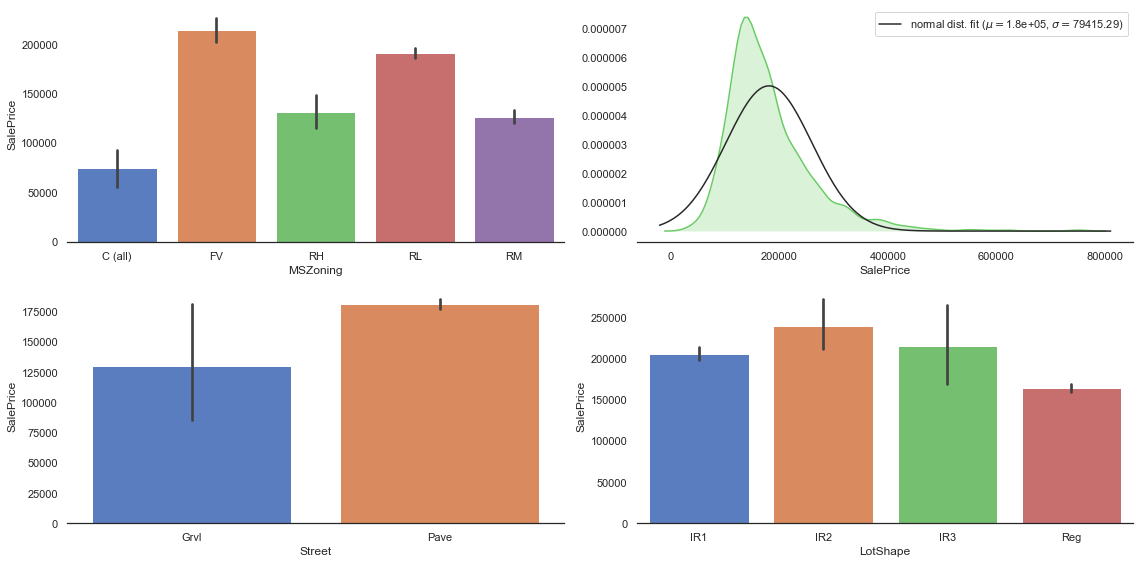

In [10]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='MSZoning',y='SalePrice',data=df_train, ax=axes[0, 0]);
# Plot a filled kernel density estimate
sns.distplot(df_train['SalePrice'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[0, 1],
            fit=stats.norm);
#Gaussian Fit for Price Distribution
(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
#print("mu={0}, sigma={1}".format(mu, sigma))
axes[0,1].legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)],loc="upper right")
# Plot a filled kernel density estimate
#sns.distplot(df_train['Street'], hist=False, color="b", kde_kws={"shade": True}, ax=axes[1, 0]);
sns.barplot(x='Street',y='SalePrice',data=df_train, ax=axes[1, 0]);
sns.barplot(x='LotShape',y='SalePrice',data=df_train, ax=axes[1, 1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

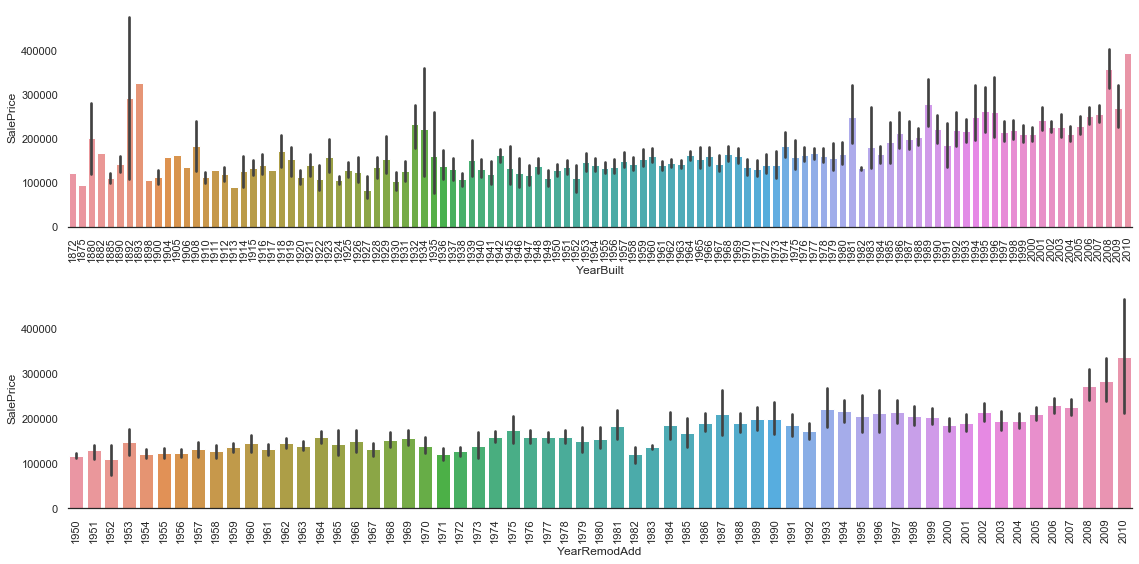

In [38]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=False)
sns.despine(left=True)

chart = sns.barplot(x='YearBuilt',y='SalePrice',data=df_train, ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(),rotation="vertical");
# Plot a filled kernel density estimate
chart = sns.barplot(x='YearRemodAdd',y='SalePrice',data=df_train, ax=axes[1]);
chart.set_xticklabels(chart.get_xticklabels(),rotation="vertical");

#plt.setp(axes, yticks=[])
plt.tight_layout()

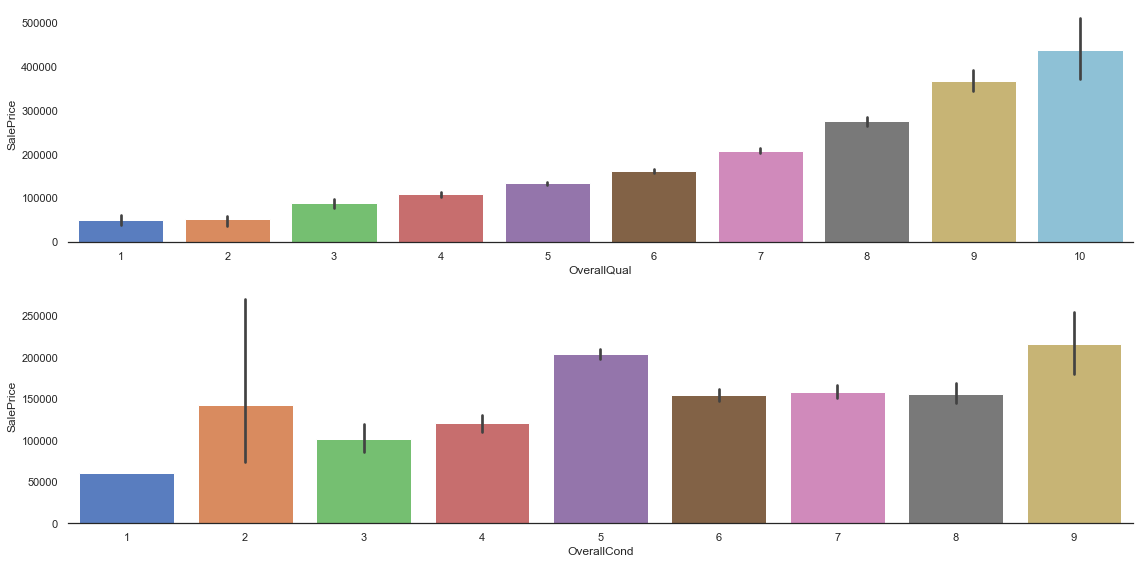

In [11]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='OverallQual',y='SalePrice',data=df_train, ax=axes[0]);
# Plot a filled kernel density estimate
sns.barplot(x='OverallCond',y='SalePrice',data=df_train, ax=axes[1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

In [12]:
df_train=df_train.drop(df_train.loc[df_train['TotalBsmtSF'] == df_train['TotalBsmtSF'].max()].index[0])

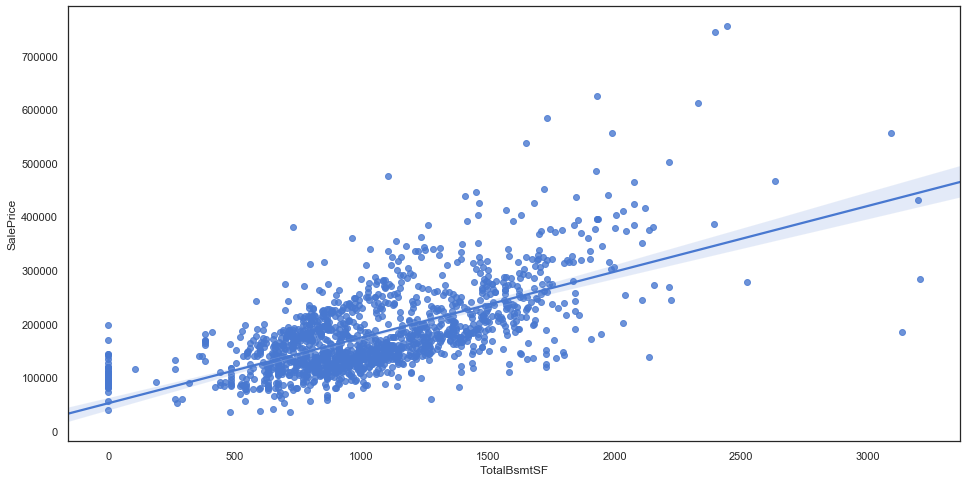

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(16,8))
# Add a Regression line to see the correlation btw bmi and charges
sns.regplot(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])
plt.show()

# Feature Selection & Forming Train, Dev and Test Sets

In [14]:
Features = ['OverallCond','OverallQual','TotalBsmtSF']
X = df_train[Features]
y = df_train['SalePrice']
X_test = df_test[Features]

In [15]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape, X_dev.shape, X_test.shape, y_train.shape, y_dev.shape)

(1167, 3) (292, 3) (1459, 3) (1167,) (292,)


# ML Algorithms

## Linear Regression

In [17]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

#To retrieve the intercept:
    #print(linreg.intercept_)
#For retrieving the slope:
    #print(linreg.coef_)
y_pred_linreg_dev = linreg.predict(X_dev)

In [18]:
df_linreg = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_linreg_dev})
df_linreg

,Actual,Predicted
1322,190000,197649.423888
836,153500,174526.441378
413,115000,144263.509041
522,159000,163706.027380
1035,84000,88059.448860
...,...,...
479,89471,100232.813087
1361,260000,240489.872569
1415,175900,232580.866658
650,205950,191699.016904


In [19]:
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_linreg_dev)))
print("Accuracy: "+ str(linreg.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Linear Regression: 41394.316727964004
Accuracy: 69.35631271984477%


## Decision Tree Regression

In [20]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, max_leaf_nodes=40)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_dev)
df_dt = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_dt})
df_dt

,Actual,Predicted
1322,190000,168775.152174
836,153500,157786.730769
413,115000,143390.693694
522,159000,161226.432039
1035,84000,97377.627907
...,...,...
479,89471,97377.627907
1361,260000,217065.131783
1415,175900,217065.131783
650,205950,199195.295082


In [21]:
print('Root Mean Squared Error for Decision Tree Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_dt)))
print("Accuracy: "+ str(dt.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Decision Tree Regression: 41593.47581956047
Accuracy: 69.0607334756112%


## Random Forest Regression

In [22]:
rf = RandomForestRegressor(max_depth = 20, n_estimators=10, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_dev)
df_rf = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_rf})
df_rf

,Actual,Predicted
1322,190000,171820.000000
836,153500,194290.000000
413,115000,137370.000000
522,159000,150750.000000
1035,84000,78568.686869
...,...,...
479,89471,116130.000000
1361,260000,239691.555556
1415,175900,114100.000000
650,205950,192700.000000


In [23]:
print('Root Mean Squared Error for Random Forest Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_rf)))
print("Accuracy: "+ str(rf.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Random Forest Regression: 43328.770786931134
Accuracy: 66.42528598806085%


# Creating Submission CSV

In [24]:
X_test

,OverallCond,OverallQual,TotalBsmtSF
0,6,5,882.0
1,6,6,1329.0
2,5,5,928.0
3,6,6,926.0
4,5,8,1280.0
...,...,...,...
1454,7,4,546.0
1455,5,4,546.0
1456,7,5,1224.0
1457,5,5,912.0


In [25]:
# Filling NaN with mean
X_test[X_test.isnull().values]
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].mean())
#X_test=X_test.drop(X_test[X_test.isnull().values].index[0])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
X_test[X_test.isnull().values]

,OverallCond,OverallQual,TotalBsmtSF


In [27]:
y_pred_rf_test = rf.predict(X_test)
df_temp = pd.concat([df_test['Id'],pd.Series(y_pred_rf_test)],axis=1)
df_temp.columns = [['Id', 'SalePrice']]

In [28]:
df_temp.to_csv("Sample_Submission_001.csv",index=False)